# **Learn to Build a Polynomial Regression Model**

# Spline regression is one method for testing non-linearity in the predictor variables and for modeling non-linear functions.

Spline regression is a non-parametric regression technique that involves dividing the range of a feature X into K distinct regions (by using so-called knots). Within each region, a polynomial function (also called a Basis Spline or B-splines) is fit to the data

This technique is used when we have a large dataset and we want to fit a curve that passes through all the points in the dataset. It is also used when we want to fit a curve that has many bends and turns

# **Build Piecewise and Spline Regression Models in Python**
In this Regression Project, you will learn how to build a piecewise and spline regression model from scratch in Python to predict the points scored by a sports team.

## **Project Overview**



The National Basketball Association (NBA) is one of the most popular professional sports leagues in the world, with a large and dedicated fan base. Understanding the factors that contribute to a team's ability to score points is crucial for coaches, team managers, and owners, as it can inform decisions related to player acquisition, training and nutrition, and game strategy.

Knowing the points scored by a particular player beforehand can also help the stakeholders to make informed decisions on the playing time and role of the player in the team. For example, if a team has a player who is consistently scoring a high number of points, it might make sense to give them more playing time or to make them a focal point of the team's offensive strategy.

Additionally, predicting the points scored by a team can also help the stakeholders to make better decisions on game day. For example, if a team is expected to score a high number of points in a game, it might make sense to adopt a more aggressive offensive strategy or to focus on defending against the opposing team's best scorers. On the other hand, if a team is not expected to score many points, it might make sense to adopt a more defensive strategy or to focus on controlling the pace of the game.

In short, being able to accurately predict the points scored by a team can be a powerful tool for coaches, team managers, and owners as it can inform decisions related to player acquisition, training and nutrition, and game strategy, as well as help them to make better decisions on game day. Ultimately, this can lead to a more successful team, which can result in increased revenue and fan engagement.



In this project, we use a dataset of various attributes such as team name, points scored, average number of weightlifting sessions, average number of yoga sessions, average number of laps run per practice, water intake, and number of players absent for sessions from the NBA to predict the points scored by a sports team using polynomial regression.




## **Learning Outcomes**

* Understanding of how to perform Exploratory Data Analysis (EDA) on the dataset, including cleaning, transforming, and visualizing the data.

* Knowledge of different imputation techniques to handle missing data.

* Understanding the theory and concepts behind polynomial regression, including the difference between linear and polynomial regression, and the relationship between the independent and dependent variables.

* Understanding of how to evaluate the goodness of fit of a regression model, including the use of R-squared, Mean Squared Error (MSE), and other performance metrics.

* Understanding of the Anova table, residual plots, and how to perform model diagnostics to identify and address model assumptions and limitations.

* Knowledge of the Chatterjee Correlation and how to use it to evaluate the relationship between the independent and dependent variables in a polynomial regression model.

* Understanding of AIC and BIC, likelihood, and the log likelihood, and how to use them to compare and select the best-fitting polynomial regression model.

## **Approach**

* Data Preprocessing
  * Outlier removal
  * Imputing null values
  * Onehot encoding
* Model Building
  * Linear regression model building
  * Polynomial regression model building
* Model Evaluation
  * Evaluation of model on test data
  * Discussion on various regression matrix-like R-squared, AIC,
F-statistics

## **Install Packages**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# python version 3.8.10
# If using Google Colab, restart runtime for updated libraries
!pip install catboost==1.0.4 --quiet
!pip install category_encoders==2.4.0 --quiet
!pip install japanize_matplotlib==1.1.3 --quiet
!pip install matplotlib==3.4.3 --quiet
!pip install matplotlib_venn==0.11.6 --quiet
!pip install numpy==1.21.5 --quiet
!pip install packaging==21.3 --quiet
!pip install pandas==1.3.5 --quiet
!pip install scikit_learn==1.0.2 --quiet
!pip install seaborn==0.11.2 --quiet
!pip install tqdm==4.62.3 --quiet
!pip install xgboost==1.5.2 --quiet
!pip install ipywidgets==7.7.0 --quiet
!pip install lightgbm==3.3.2 --quiet


## **Data Reading**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


<IPython.core.display.Javascript object>

In [ ]:
#reading data
data = pd.read_csv("NBA_Dataset_csv.csv")

In [ ]:
#view top 3 entries
data.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [ ]:
# shape of the data
print("Dimension of the dataset is= ",data.shape)

Dimension of the dataset is=  (159, 7)


In [ ]:
# columns of data
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

## **Data Dictionary**

* Team: name of the team
* Points_Scored: points scored by the team
* Weightlifting_Sessions_Average: weighlifting sessions on an average done by the team
* Yoga_Sessions_Average: yoga sessions on an average done by the team
* Laps_Run_Per_Practice_Average: laps run on an average by the team
* Water_Intake: total water intake
* Players_Absent_For_Sessions: number of players absent for sessions



## **Exploratory Data Analysis**
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data.

It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


In [ ]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


There are total 159 rows and 7 columns in the NBA Dataset.

Observe that there are a few null values in the dataset.

Learn about Essential basic functionality for pandas dataframe [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes).



In [ ]:
# renaming required columns
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga',
                        'Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI',
                        'Players_Absent_For_Sessions':'PAFS'})


In [ ]:
# top rows post renaming the columns
df.head()

,Team,Points,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


### **Distribution Plots**

Distribution plots are graphical representations that show the distribution of a set of numerical data. These plots are used to gain insight into the characteristics of the data, such as the central tendency, spread, and skewness. There are several types of distribution plots, including histograms, density plots, box plots, and violin plots.

* A histogram is a bar graph that represents the frequency distribution of a set of data. It shows how many data points fall into each range of values or bin. The bars in the histogram represent the frequency of data points within a given range, and the height of each bar represents the number of data points in that bin.

* A density plot is a smoothed representation of the distribution of the data, which is calculated by fitting a probability density function to the histogram of the data. It shows the shape of the distribution and provides a visual representation of the relative density of the data at different values.

* A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a set of data. It shows the median, quartiles, and outliers of the data in a compact and easily interpretable format. The box in the plot represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend from the box to the minimum and maximum values of the data, and any outliers are plotted as individual points outside the whiskers.

* A violin plot is a combination of a density plot and a box plot, showing the density of the data along the y-axis and the distribution along the x-axis. It shows the distribution of the data in a compact format, and provides information on the central tendency, spread, and skewness of the data.

* Distribution plots are an important tool for exploratory data analysis and can help in understanding the distribution of the data, identifying patterns and outliers, and making informed decisions about the data. They provide a visual representation of the data and can be used to identify potential issues with the data, such as non-normality or outliers.

Text(0.5, 1.0, 'Distribution Plot for Points')

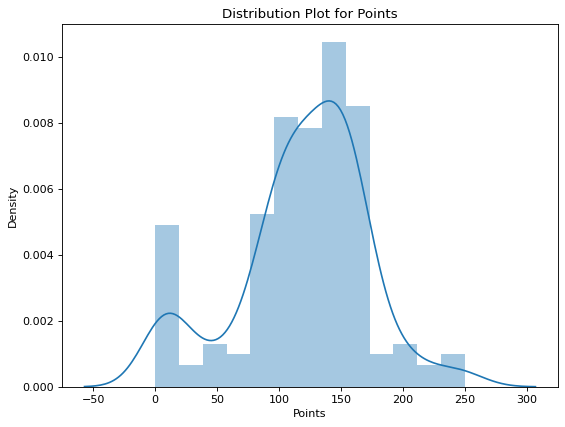

In [ ]:
#DistPlot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(df.Points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Points")

Text(0.5, 1.0, 'Distribution Plot for Square Root of Points')

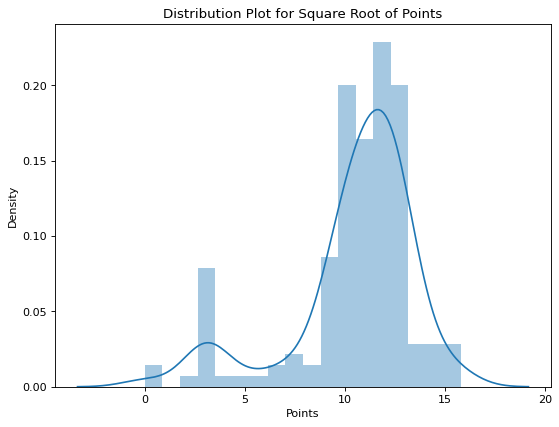

In [ ]:
#distplot can be replaced with displot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(np.sqrt(df.Points))
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Square Root of Points")

Text(0.5, 1.0, 'Box Plot for Points')

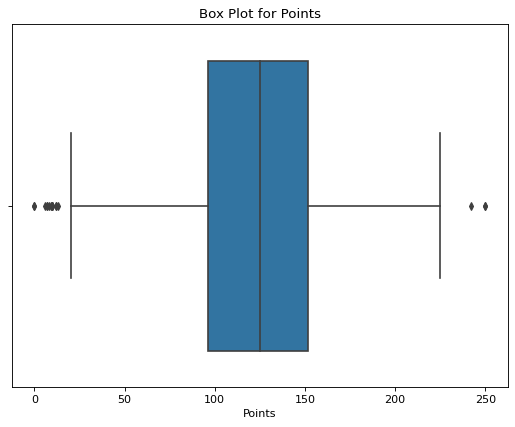

In [ ]:
#boxplot visualization
figure(figsize=(8, 6), dpi=80)
sns.boxplot(df.Points)
plt.title("Box Plot for Points")

In [ ]:
df.tail(100)

,Team,Points,WL,Yoga,Laps,WI,PAFS
59,Clippers,156,34.0,28.0,40.0,5.0,5.0
60,Clippers,122,37.0,29.0,44.0,5.0,2.0
61,Warriors,55,14.0,8.0,17.0,3.0,3.0
62,Warriors,60,14.0,8.0,17.0,3.0,4.0
63,Warriors,90,16.0,11.0,20.0,3.0,7.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [ ]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):
  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and box plots for variable : {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable : {}".format(y))
  axes[1].set_title("Box plot for variable : {}".format(y))



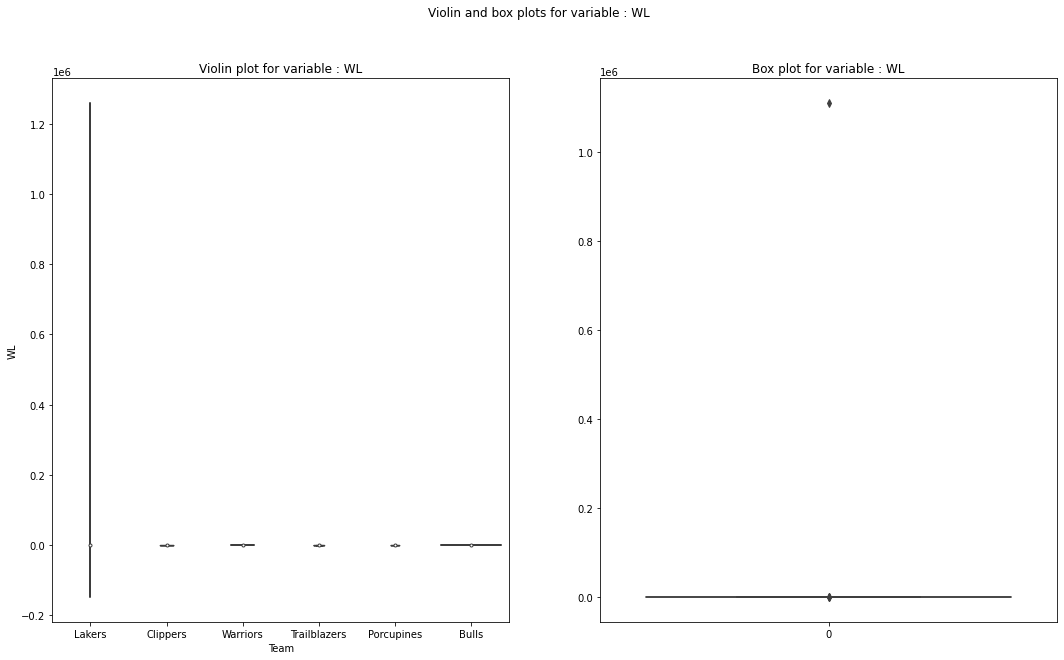

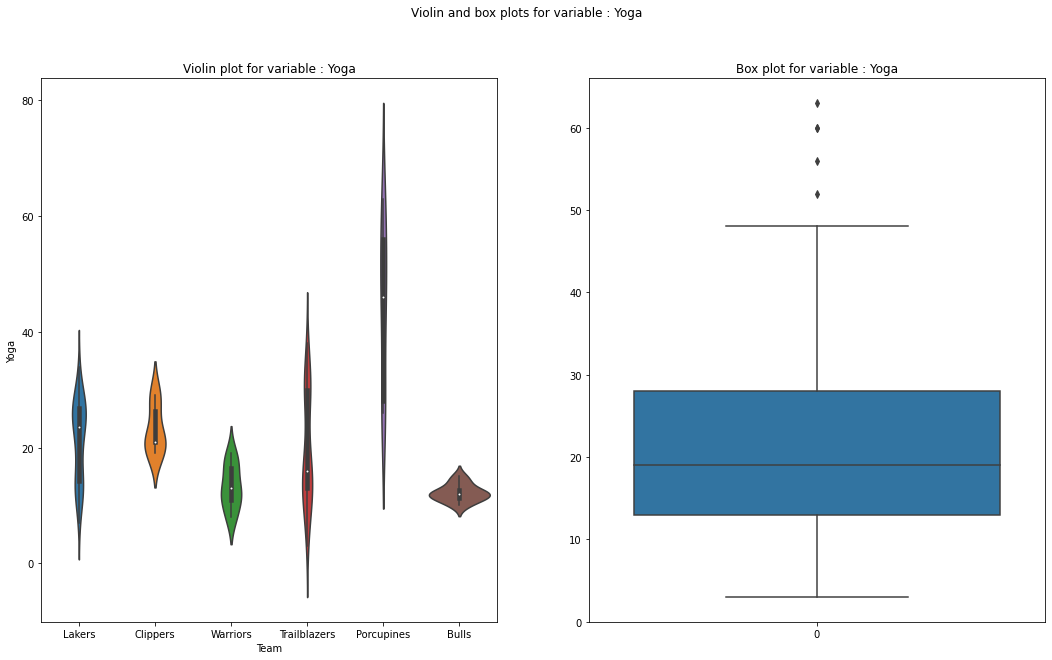

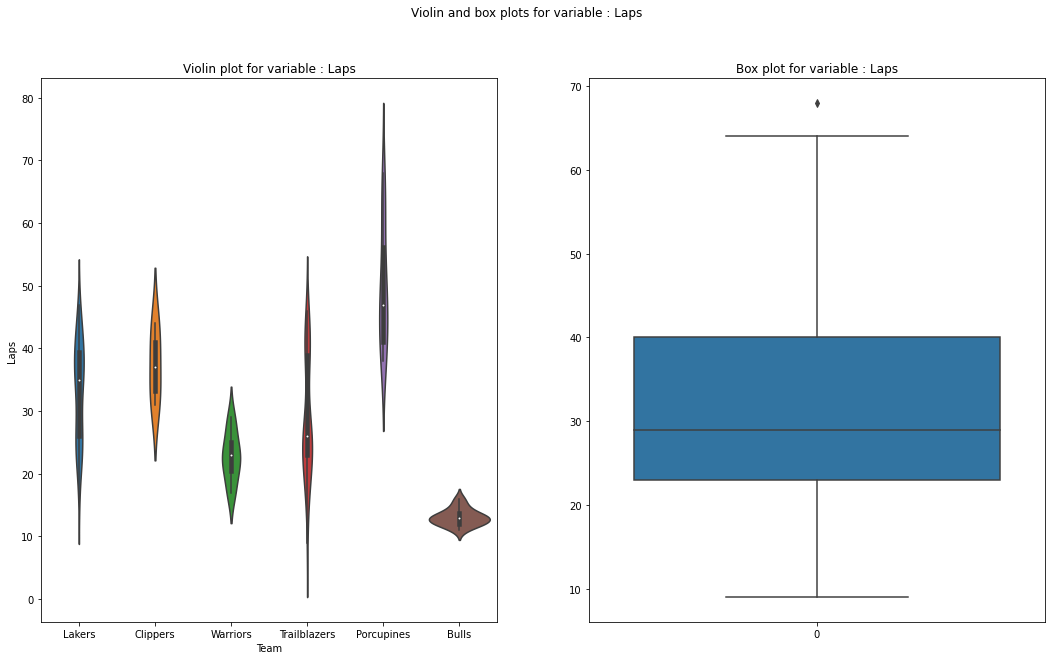

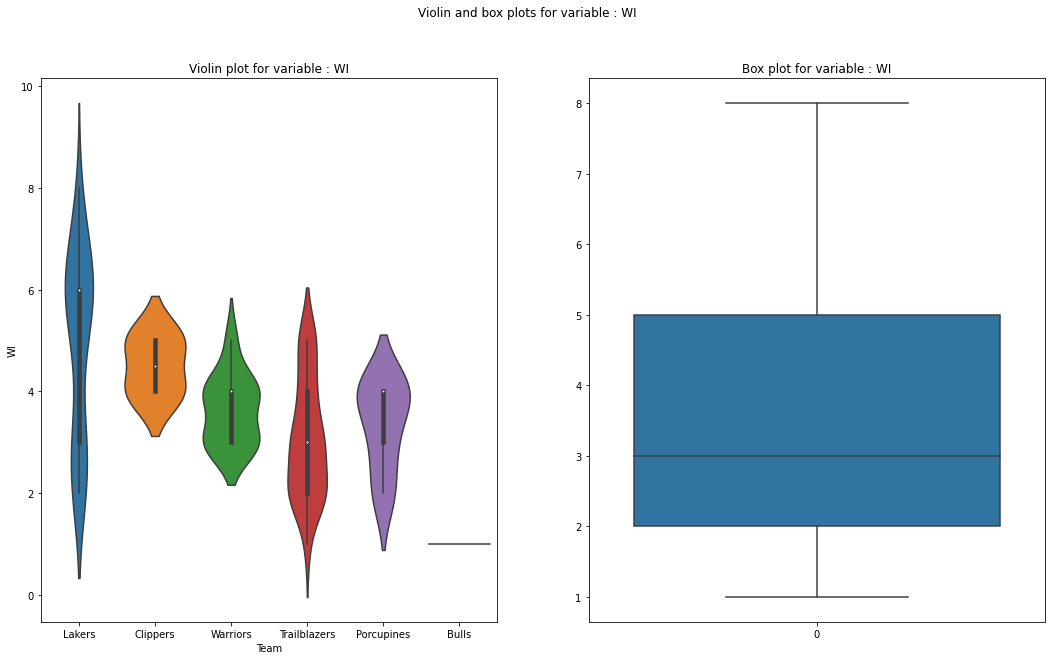

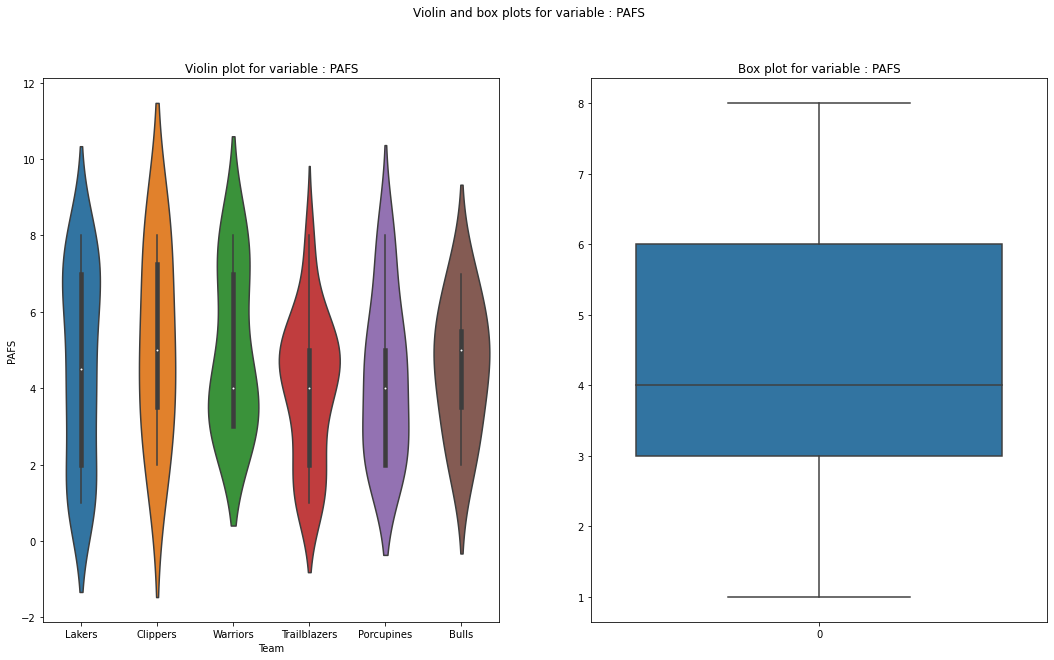

In [ ]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
  plotting_box_violin_plots(df,"Team",x)

### **Did you know - I**

Did you know that violin plots are a combination of box plots and kernel density plots? The shape of a violin plot is similar to a box plot, but it also shows the probability density of the data at different values, with wider areas indicating higher probability density. This makes violin plots a great tool for visualizing the distribution and shape of the data.

### **Finding Outliers using Inter Quartile Range**

The Interquartile Range (IQR) is a commonly used method for identifying outliers in a dataset. The IQR is calculated as the difference between the 75th and 25th percentiles of the data, and outliers are considered to be any observations that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is based on the assumption that the data is approximately normally distributed.

The IQR is a robust statistic, meaning that it is not greatly affected by outliers in the data. This makes it a useful tool for finding outliers, particularly in datasets that contain a high degree of variability. The IQR method is a simple way of detecting outliers in a dataset and can be easily implemented in most data analysis software.

By using IQR to identify outliers, it is possible to obtain a more accurate representation of the central tendency and variability of the data, which can be used to make more informed decisions about the data. It can also help to identify potential data errors or outliers that may be affecting the results of subsequent analysis.

In [ ]:
#function for finding out outliers
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End)| (df[column]<Lower_End) ]

  return outlier

In [ ]:
for column in ['WL','Yoga','Laps','WI','PAFS']:
  print('\n Outliers in column "%s"' %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [ ]:
#removing outliers
df_clean=df.drop([142,143,144])

In [ ]:
df_clean.shape

(156, 7)

In [ ]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [ ]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

### **Think about it - I**

* Are there any assumptions or limitations associated with using the IQR method to identify outliers?

* Can you think of other methods for identifying and dealing with outliers in a dataset?


## **Imputation Techniques**

Data imputation refers to the process of filling in missing values in a dataset. In machine learning, imputing missing values is important because many algorithms are sensitive to missing values and cannot handle them effectively. If missing values are not handled, they can lead to biased or incorrect results, especially when using methods like regression, decision trees, and clustering.

There are several techniques used for data imputation in machine learning, including:

Mean/Median/Mode imputation: In this method, missing values are replaced by the mean, median, or mode of the non-missing values in the same column. Mean imputation is used for continuous variables, median imputation for ordinal variables, and mode imputation for categorical variables. This method is simple and easy to implement, but it can result in loss of information and introduce bias if the distribution of the data is not symmetrical.

Regression imputation: In this method, a regression model is used to predict the missing values based on the values of the other variables in the dataset. The regression model can be linear, polynomial, or any other type of regression model. The advantage of this method is that it can capture the relationship between the variables, but it requires a well-defined regression model and can result in overfitting if the model is too complex.



In [ ]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [ ]:
ncounts=ncounts.rename(columns={1:'data_missing'})

In [ ]:
ncounts

,0
Team,0.000000
Points,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<AxesSubplot:title={'center':'% of missing values across each column'}>

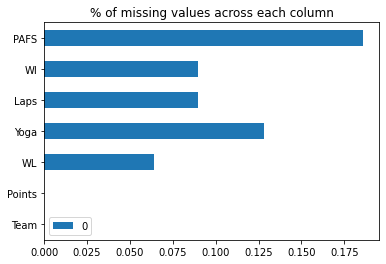

In [ ]:
#plot of missing value in each column
ncounts.plot(kind='barh',title='% of missing values across each column')


In [ ]:
####
# 1. Pandas Way -> F fill and B fill, groupby
# 2. Sklearn -> Imputer -> Simple, Iterative, KNN
# 3. LGBM -> To fill in the missing values

In [ ]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [ ]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

### Lets start with Pandas Imputer

Pandas provides various methods for data imputation, including forward fill (ffill), backward fill (bfill), and group-by imputation.

* ffill imputes missing values with the value from the previous observation in the same column.

* bfill imputes missing values with the value from the next observation in the same column.

* groupby imputation is a more advanced technique where the missing values are imputed based on the values from other observations that are in the same group. This technique is often used when the missing values are not missing at random and are related to other variables in the data.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      146 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [ ]:
#filling missing values with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for WL')

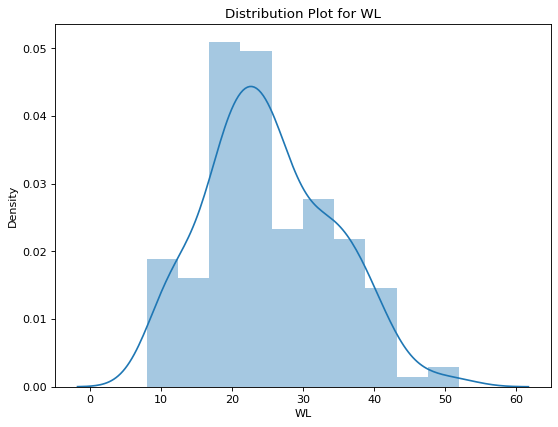

In [ ]:
#visualizing after filling missing value with mean
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

Text(0.5, 1.0, 'Distribution Plot for WL')

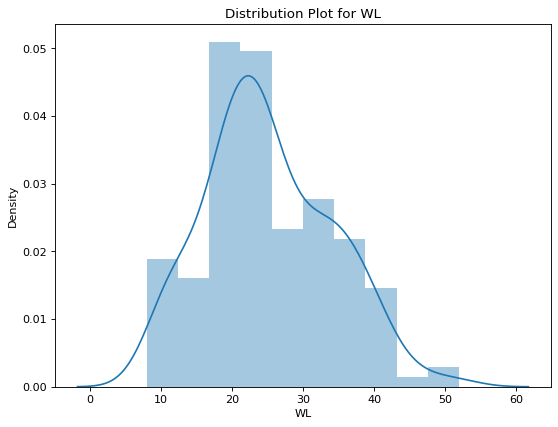

In [ ]:
#visualizing after filling missing value with median
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")


In [ ]:
#Groupby team
mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()

In [ ]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [ ]:
WL_series= df_clean['WL'].replace(mean_WL)

Text(0.5, 1.0, 'Distribution Plot for WL')

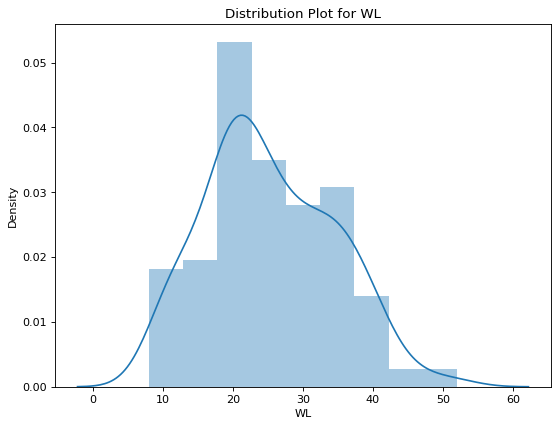

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].replace(mean_WL))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

In [ ]:
df_clean['WL'].replace(mean_WL)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [ ]:
#you can use this function too
# df_clean['WL']=df_clean.groupby('Team')['WL'].transform(lambda x:x.fillna(x.mean()))

### Sklearn Imputer

sklearn.impute is a module in scikit-learn library that contains different imputation techniques for handling missing values in datasets. The main imputers provided by this module are:

* SimpleImputer: This imputer is a basic and straightforward imputation technique that replaces missing values with the mean, median, or most frequent value of the column.

* IterativeImputer: This imputer replaces missing values by modeling each feature with missing values as a function of other features and then iteratively filling in missing values. This method works well when the missing values are missing at random and there is a high correlation between the features.

* KNN imputation is an advanced method for handling missing values. The basic idea behind KNN imputation is to fill missing values with the mean of the k-nearest neighbors to the missing value. This method requires that you choose a distance metric and the value of k. The advantage of KNN imputation is that it can preserve the correlations in the data, which is important for many machine learning algorithms.

In summary, scikit-learn provides a variety of imputation techniques, each with its own strengths and weaknesses. Choose the imputation technique that works best for your specific dataset and problem.

In [ ]:
# 1 Simple Imputer

Features=['WL','Yoga','Laps','WI','PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

#Fit & Transform

si_impt=impt.fit_transform(df_clean[Features])
si_impt_df=pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
ITI=IterativeImputer(max_iter=10)

#Fit & Transform

ITI_impt=ITI.fit_transform(df_clean[Features])

ITI_impt_df=pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.063002,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.413163
152,12.0,12.000000,14.0,1.0,4.413298
153,12.0,13.000000,14.0,1.0,4.413450
154,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
# KNN Imputer

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[Features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


### LGBM Imputer

LGBMImputer is a data imputation technique from the Python project kuma_utils https://github.com/analokmaus/kuma_utils.git, which is based on the LightGBM library. LGBMImputer is designed to fill in missing values in a dataset using gradient boosting decision trees. This technique is a variation of tree-based imputation, which uses regression trees to make predictions for missing values based on the values of other variables in the dataset.

The LGBMImputer class takes in a dataset and a list of columns to be imputed as inputs. It then fits a LightGBM model to the data, with the target variable being the missing values and the features being the remaining variables. After training, the model is used to predict the missing values.

One advantage of LGBMImputer is that it is able to handle both categorical and numerical data, unlike some other imputation techniques that are only suitable for one or the other. Additionally, LightGBM is a fast and efficient algorithm, so LGBMImputer is able to handle large datasets with many missing values quickly.

In [ ]:
# clone the repository
!git clone https://github.com/analokmaus/kuma_utils.git

Cloning into 'kuma_utils'...
remote: Enumerating objects: 971, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 971 (delta 140), reused 137 (delta 113), pack-reused 795
Receiving objects: 100% (971/971), 690.13 KiB | 6.00 MiB/s, done.
Resolving deltas: 100% (628/628), done.


In [ ]:
# add to path
sys.path.append('kuma_utils/')

In [ ]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [ ]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 230 ms, sys: 8.86 ms, total: 238 ms
Wall time: 164 ms


In [ ]:
df_itr_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.805411
155,12.0,12.000000,14.0,1.0,3.805411
156,12.0,13.000000,14.0,1.0,3.953409
157,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
df_new=df_itr_df

### **Univariate Analysis**

Univariate analysis is a statistical technique used to examine the distribution of a single variable. It is the simplest form of data analysis that helps to understand the patterns, central tendency, and spread of the data.

There are several types of univariate analysis techniques, including:

* **Histograms**: A histogram is a graph that represents the frequency distribution of a set of data. It provides a visual representation of how the data is spread over a range of values. The x-axis represents the range of values and the y-axis represents the frequency of those values.

* **Box Plots**: A box plot is a visual representation of the distribution of a set of data. It consists of a box that encloses the middle 50% of the data (the interquartile range), a line that represents the median, and two whiskers that extend from the box to the minimum and maximum values. Outliers are also indicated on the plot.

* **Distribution Plots**: Distribution plots display the shape of the distribution of a single variable. They help to visualize the skewness and kurtosis of the data, as well as the presence of any outliers or extreme values. Examples of distribution plots include kernel density plots, normal quantile plots, and probability plots.

Univariate analysis is an important step in the data exploration process, as it helps to identify any outliers, skewness, or patterns in the data that may impact further analysis or modeling.






In [ ]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

<AxesSubplot:xlabel='WL', ylabel='Density'>

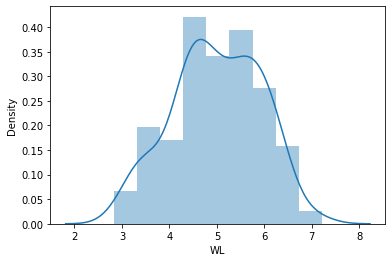

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["WL"]))

<AxesSubplot:xlabel='WL'>

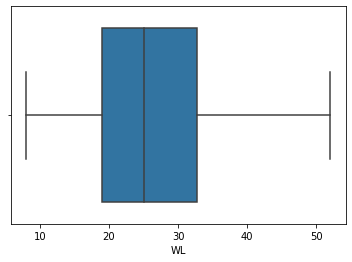

In [ ]:
#boxplot
sns.boxplot(df_new["WL"])

<AxesSubplot:>

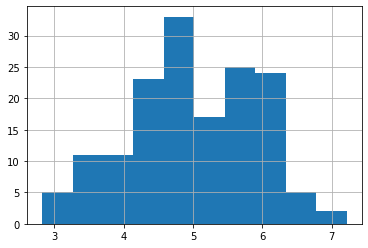

In [ ]:
#histogram plot
np.sqrt(df_new["WL"]).hist()

<AxesSubplot:>

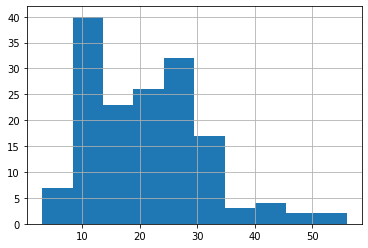

In [ ]:
###Yoga

df_new["Yoga"].hist()

<AxesSubplot:xlabel='Yoga', ylabel='Density'>

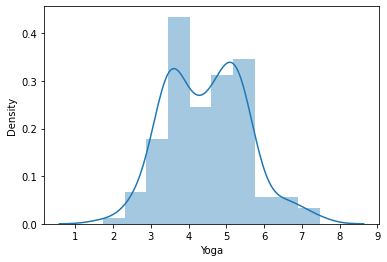

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["Yoga"]))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

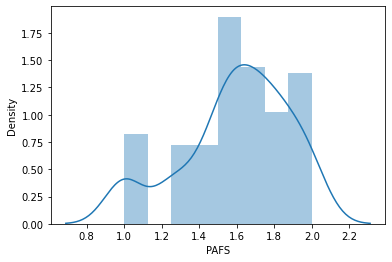

In [ ]:
#distrribution plot
sns.distplot(np.cbrt(df_new["PAFS"]))

### **Bivariate Analysis**

Bivariate analysis is a statistical method used to analyze the relationship between two variables. It involves examining the relationship between two variables and determining if there is a correlation or association between the variables. The goal of bivariate analysis is to identify patterns and relationships in data that can be used to make predictions or draw conclusions.

In [ ]:
##Bivariate Analysis

## 1 Linear Correlation --> Pearson Corelation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [ ]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:
df_new["Points"]=df_clean['Points']
df_new["Team"]=df_clean['Team']


In [ ]:
#corerelation matrix
df_new.corr()

,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.940899,0.989656,0.716546,0.001012,0.448556
Yoga,0.940899,1.000000,0.927862,0.617798,0.026512,0.343593
Laps,0.989656,0.927862,1.000000,0.776036,0.024935,0.479233
WI,0.716546,0.617798,0.776036,1.000000,0.129837,0.425148
PAFS,0.001012,0.026512,0.024935,0.129837,1.000000,0.048566
Points,0.448556,0.343593,0.479233,0.425148,0.048566,1.000000


Text(0.5, 1.0, 'Linear Correlation Matrix')

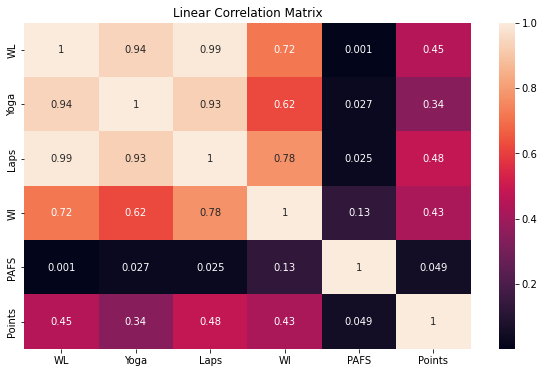

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)

#heatmap of correlation matrix
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Matrix")

#### **Pairplots**
Pairplot, also known as scatterplot matrix, is a plotting technique used in bivariate data analysis. It creates a matrix of scatter plots, where each pair of features in a dataset is represented by a scatter plot in a grid format. The purpose of a pairplot is to visualize the relationship between multiple variables in a dataset and to observe any trends or patterns.

Each scatter plot in a pairplot compares two features and plots the values of one feature on the x-axis and the other feature on the y-axis. In the diagonal of the matrix, histograms or density plots are used to visualize the distribution of individual features.

Pairplot is a useful tool for understanding relationships between features, identifying outliers, and detecting any non-linear relationships. However, for a large number of features, the number of scatter plots can become overwhelming, making it difficult to draw meaningful conclusions. In such cases, other visualization techniques such as heatmaps or parallel coordinates plots may be used instead.

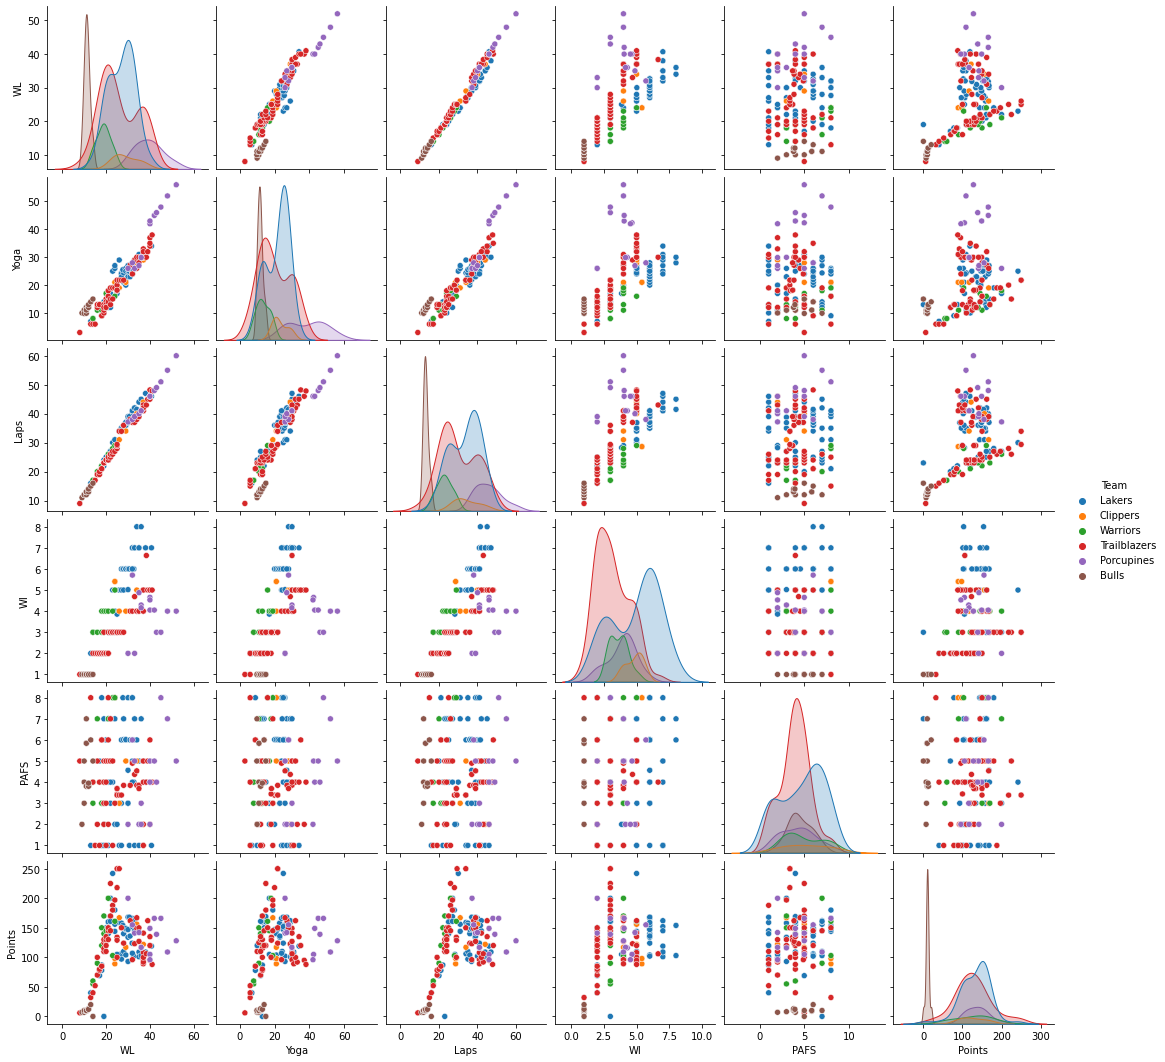

In [ ]:
#pairplot of the data
sns.pairplot(df_new,kind='scatter',hue='Team')

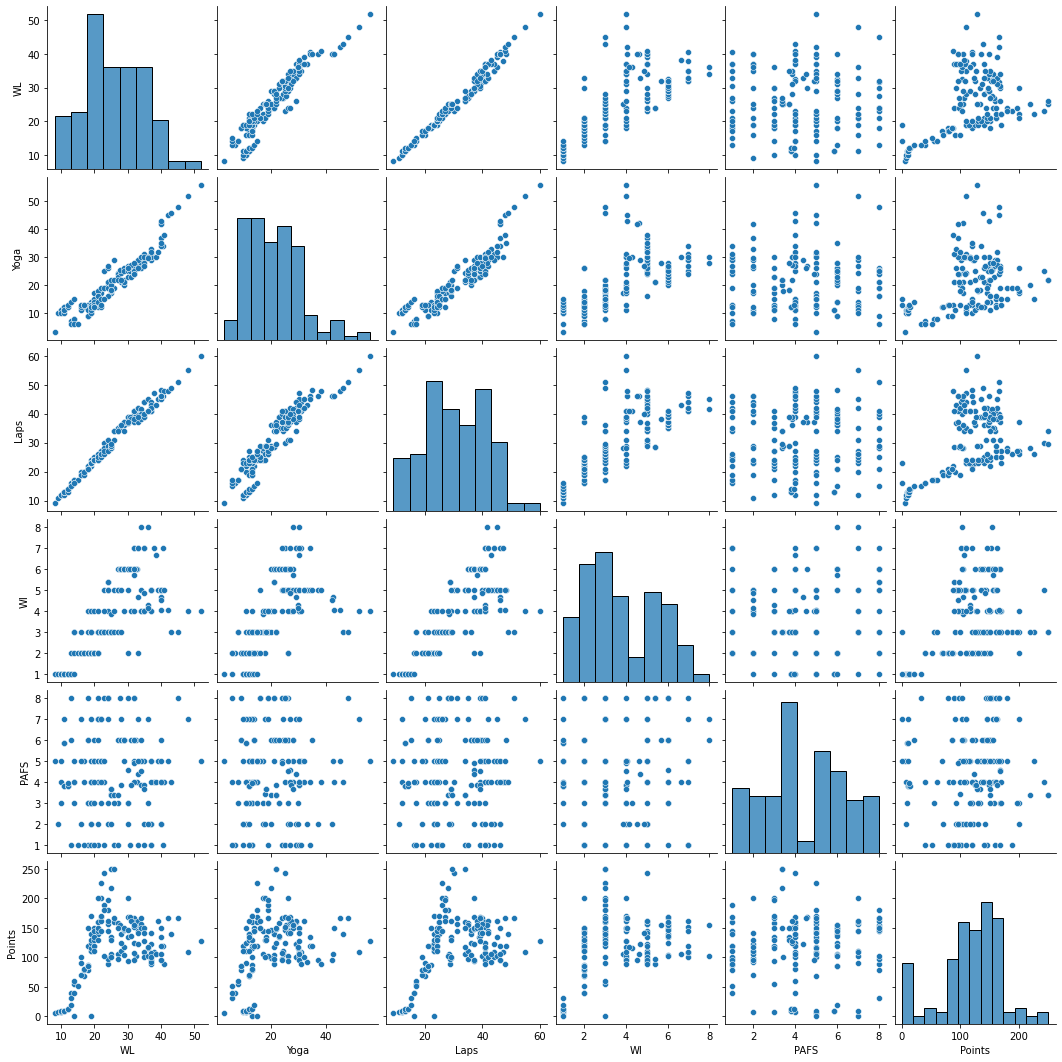

In [ ]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')

#### **Chatterjee Correlation**

Chatterjee correlation is a coefficient of correlation proposed by Sourav Chatterjee that measures the degree of dependence between two random variables without assuming anything about their distributions. It is a simple and interpretable measure of dependence that ranges between 0 and 1, where 0 indicates independence and 1 indicates that one variable is a measurable function of the other.

Compared to other correlation coefficients, the Chatterjee Correlation is less sensitive to outliers and non-linear relationships between variables. However, it requires more computational resources due to its non-parametric nature.


One advantage of the Chatterjee correlation is that it has a simple asymptotic theory under the hypothesis of independence, similar to classical coefficients like Pearson's and Spearman's correlations. This means that we can use it to test the null hypothesis of independence between two variables.

The calculation involves the following steps:

* Rank the values of Y in the data set, assigning the smallest value the rank of 1, the second smallest the rank of 2, and so on. Store these ranks in a new column called 'rank'.

* Rank the values of X in the data set, assigning the smallest value the rank of 1, the second smallest the rank of 2, and so on. Store these ranks in a new column called 'rank_x'.

* Sort the data set in increasing order of 'rank_x'.

* Calculate the absolute difference between the ranks of Y for consecutive values of X. Sum up these differences.

* Calculate the Chatterjee correlation coefficient using the formula:
Chatterjee correlation coefficient = 1 - 3 * (sum of absolute differences in ranks) / (N^2 - 1), where N is the number of observations in the data set.

* The resulting Chatterjee correlation coefficient is a number between 0 and 1, with 0 indicating no dependence between the two variables and 1 indicating complete dependence.


In [ ]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
  N=df.shape[0]
  df_rank=df

  df_rank['rank']=df_rank[y].rank()
  #print(df_rank['rank'])

  df_rank['rank_x']=df_rank[x].rank()

  df_rank=df_rank.sort_values(by='rank_x')

  #1-3*(abs(sum(xri-1 - Xir))/n square-1

  #Diff function --> summation -> absolute

  chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

  return chatt_corr


In [ ]:
chatterjee_corr(df_new,'WL','Points')

0.4062872405999589

In [ ]:
chatterjee_corr(df_new,'WI','Points')

0.39198685021573865

In [ ]:
chatterjee_corr(df_new,'Laps','Points')

0.4229299363057325

In [ ]:
chatterjee_corr(df_new,'PAFS','Points')

0.0019930141771111742

In [ ]:
chatterjee_corr(df_new,'Yoga','Points')

0.2911444421614958

In [ ]:
# determining whether team essentially affects the points variable for the dataset


### **Single Way ANOVA**

ANOVA, or Analysis of Variance, is a statistical method used to test whether there are significant differences between the means of two or more groups. It is a generalization of t-tests, which can only be used to compare two groups, and is commonly used in experimental design and analysis.

In order to perform ANOVA, you need at least one continuous variable and one categorical variable that separates your data into comparison groups. The test compares the variance of group means to the variance of the groups, which allows you to determine if the groups are part of a larger population or if they are separate populations with different means.

The null hypothesis for ANOVA is that all groups have the same mean, while the alternative hypothesis is that at least one group has a different mean. The test calculates $F$ values, which are the ratio of the between- and within-group mean squares, and p-values. The $F$ value is used to determine whether or not the means of the groups are significantly different, while the p-value is used to determine the probability of obtaining a certain $F$ value by chance.

It is important to note that ANOVA only tells you that there is a difference between groups, but not where the difference is.

Overall, ANOVA is a powerful statistical tool that can help you understand whether there are significant differences between the means of different groups. It can be used in a wide range of fields, including biology, psychology, and engineering, to help researchers gain insights into their data and make informed decisions.


In [ ]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)

In [ ]:
sample_match_id=random.sample(nba_id,50)

In [ ]:
sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [ ]:
sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()

In [ ]:
groups

,Team,Points
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


In [ ]:
##Normality

import scipy.stats as stats

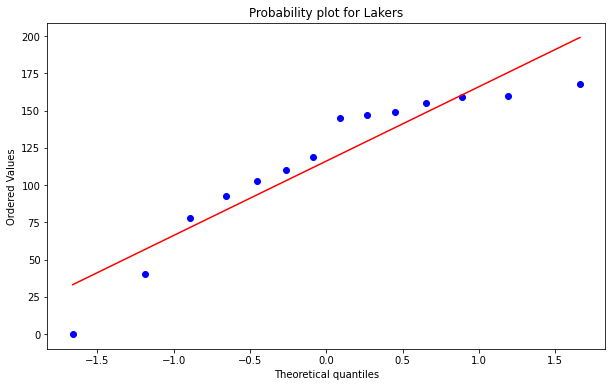

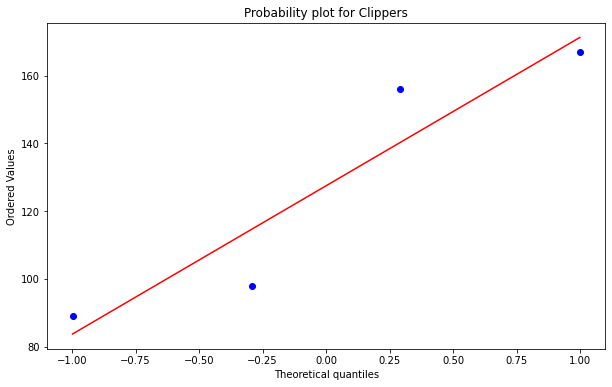

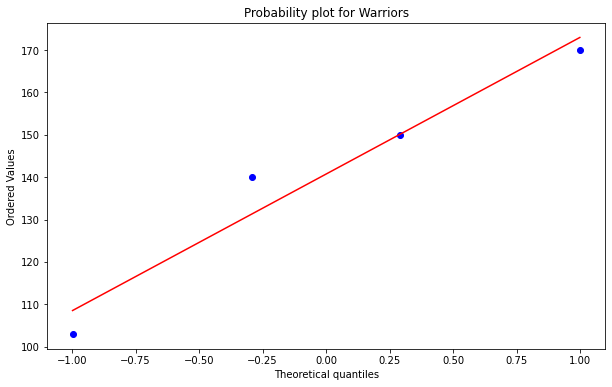

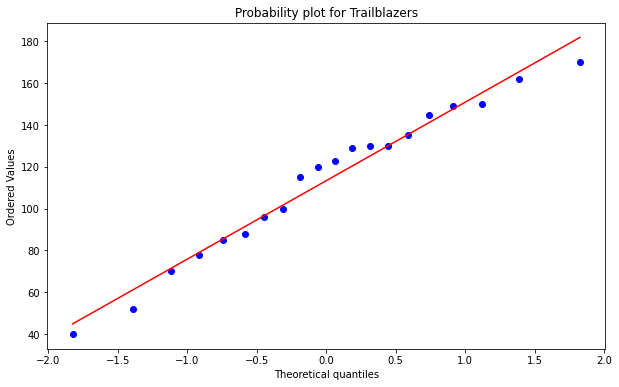

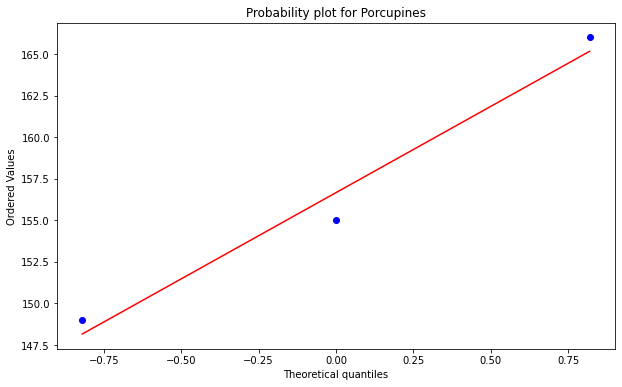

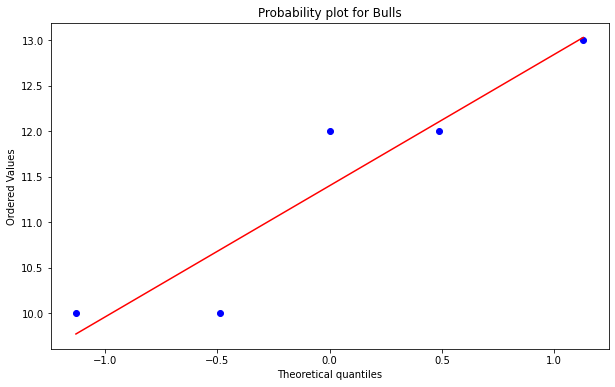

In [ ]:
unique_teams=sample_df['Team'].unique()
#quantile quantile plots
for i in unique_teams:
  stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
  plt.title('Probability plot for '+ i)
  plt.show()

In [ ]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    37.164289
dtype: float64

In [ ]:
#implement anova from scratch

data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [ ]:
x_bar=sample_df['Points'].mean()

#porcupines - 2 overall 10 8
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [ ]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [ ]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,,,,,,
Total,,,,,,


In [ ]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [ ]:
SSE

,Points
Team,
Bulls,7.200000
Clippers,4725.000000
Lakers,32319.714286
Porcupines,148.666667
Trailblazers,24798.550000
Warriors,2366.750000


In [ ]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()

In [ ]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,,,,,,


In [ ]:
total=SSE['Points'].sum()+SSTR['Points'].sum()

In [ ]:
anova_table['SS']['Total']=total

In [ ]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,125268.02,,,,,


In [ ]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [ ]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,,,,
Within Groups,64365.880952,44,,,,
Total,125268.02,49,,,,


In [ ]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [ ]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
  alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,2.871184
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [ ]:
# Pvalue approach

print("Approach for P value ")

conclusion="Failed to reject null hypothesis"

if anova_table['P value']['Between Groups']<=alpha:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and p value is ",anova_table['P value']['Between Groups'] )

print(conclusion)

Approach for P value 
F value for the table is  8.326442762673361 and p value is  1.3292810565279645e-05
Null hypothesis is rejected


In [ ]:
# F critical approach

print("Approach for F critical ")

conclusion="Failed to reject null hypothesis"

if anova_table['F value']['Between Groups']>anova_table['F critical']['Between Groups']:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and F critical value is ",anova_table['F critical']['Between Groups'] )

print(conclusion)

Approach for F critical 
F value for the table is  8.326442762673361 and F critical value is  2.871183837102218
Null hypothesis is rejected


In [ ]:
## Processing data for modelling
#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [ ]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [ ]:
#Start Imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
85,19.0,12.000000,23.000000,3.0,3.000000,0,0,0,1,0
104,25.0,22.605504,29.000000,3.0,4.383336,0,0,0,1,0
105,25.0,22.429754,28.832621,3.0,4.588605,0,0,0,1,0
65,18.0,11.000000,22.000000,4.0,3.000000,0,0,0,0,1
149,11.0,12.504986,12.000000,1.0,7.000000,0,0,0,0,0


## **Modeling**


### **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively.


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:

* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.


**Example:** Assume your father owns an ice cream shop. Sometimes there is too much ice cream in the store, and other times there isn't enough to sell.
You notice that ice cream sales are much higher on hot days than on cold days.
There appears to be some correlation between the temperature and the sale of ice cream.

Now you must determine the optimal number of ice creams to store in order to sell enough and have little left over at the end of the day.

How can you forecast the sale for the next few days?

Is there any way to predict the sale of the next day given the temperature of the last few days?

Yes, you can use simple linear regression to model the relationship between temperature and sales.



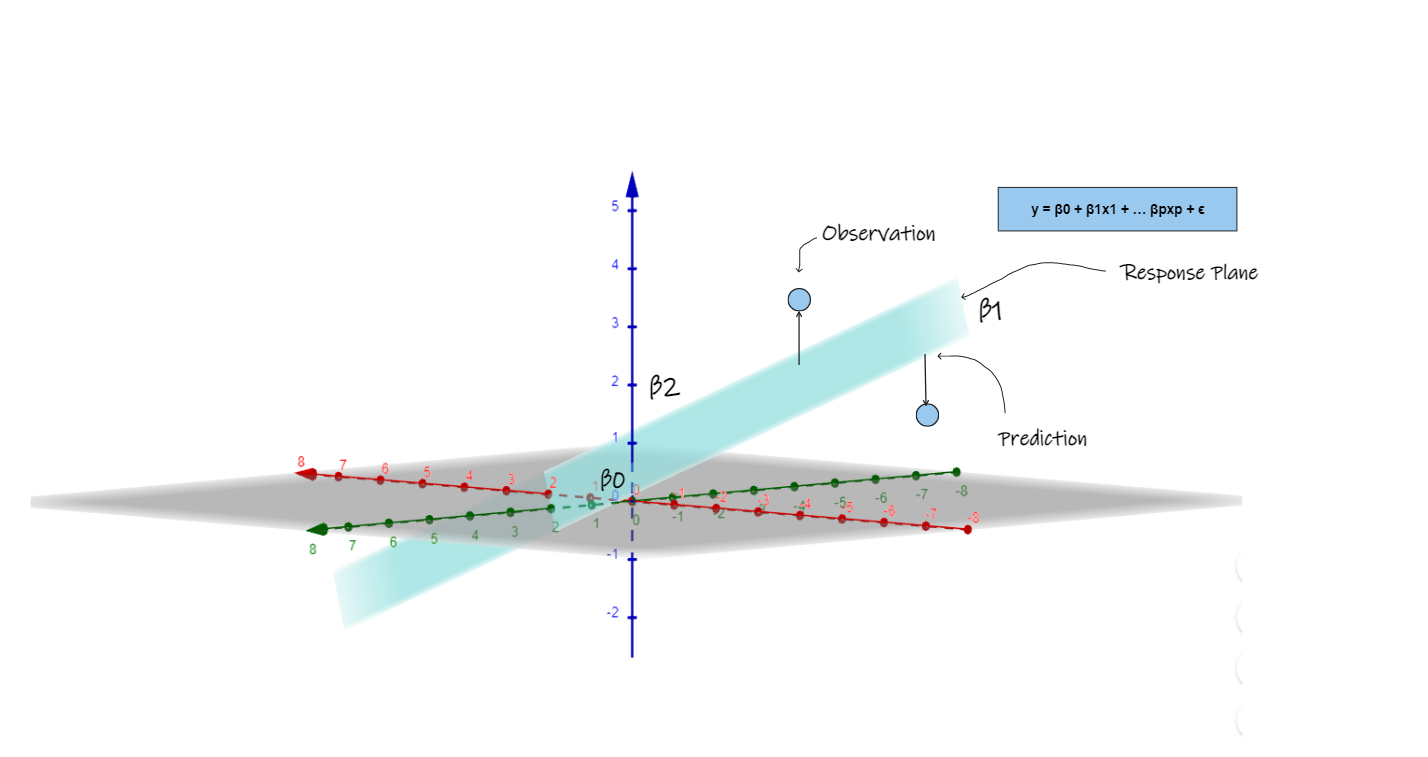

### **Did you know - II**

Did you know that linear regression was first used by Sir Francis Galton in the late 1800s to study the relationship between the heights of parents and their children?

In the late 1800s, Galton conducted a study to explore the relationship between the heights of parents and their children, which is now considered one of the earliest examples of a regression analysis. He observed that there was a tendency for children's heights to regress towards the mean height of the population, rather than simply being the average of their parents' heights.

The term "regression" comes from the notion that extreme values (whether high or low) tend to move or "regress" towards the mean in subsequent generations. In regression analysis, the term refers to the relationship between a dependent variable and one or more independent variables, where the dependent variable "regresses" towards the mean of the independent variables.






In [ ]:
result=sm.OLS(y_train,X_train_clean).fit()

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              112.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                    2.91e-54
Time:                        08:08:07   Log-Likelihood:                         -632.57
No. Observations:                 124   AIC:                                      1285.
Df Residuals:                     114   BIC:                                      1313.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     8.653
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.19e-10
Time:                        08:08:09   Log-Likelihood:                -632.52
No. Observations:                 124   AIC:                             1287.
Df Residuals:                     113   BIC:                             1318.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.0449     18.24

### **Interpreting Linear Regression Results**

The regression summary from the OLS library provides several key statistics and measures related to the regression analysis. Here is a list of some of the most important information that you get in the regression summary:

* Dep. Variable: The dependent variable for the regression model, which is also known as the response variable.

* Model: The regression model used for the analysis, for example, OLS (Ordinary Least Squares).

* Method: The optimization method used to fit the model, for example, Least Squares.

* R-squared: The coefficient of determination (R-squared) measures the proportion of variation in the dependent variable that can be explained by the independent variables. The higher the R-squared, the better the model fits the data.

* Adj. R-squared: The adjusted R-squared adjusts the R-squared for the number of independent variables in the model. It gives a better measure of model fit when comparing models with different numbers of independent variables.

* F-statistic: The F-statistic measures the overall significance of the regression model. It tests the null hypothesis that all of the independent variables have zero impact on the dependent variable.

* Prob (F-statistic): The p-value for the F-statistic, which represents the probability of observing the F-statistic given the null hypothesis is true. A low p-value indicates that the model is significant.

* Log-Likelihood: The log-likelihood measures the goodness of fit of the model based on the likelihood function.

* AIC: The Akaike Information Criterion (AIC) is a measure of the relative quality of a statistical model, taking into account both the goodness of fit and the complexity of the model. A lower AIC indicates a better-fit model.

* BIC: The Bayesian Information Criterion (BIC) is similar to the AIC, but places more emphasis on the complexity of the model. A lower BIC indicates a better-fit model.

* Coef: The estimated coefficients for the independent variables in the model. Each coefficient represents the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other independent variables constant.

* std err: The standard error for each coefficient, which is an estimate of the variability of the coefficient.

* t: The t-value for each coefficient, which measures the significance of the coefficient. A high t-value indicates that the coefficient is significantly different from zero.

* P>|t|: The p-value for each coefficient, which represents the probability of observing the t-value given the null hypothesis that the coefficient is zero. A low p-value indicates that the coefficient is significant.

* Omnibus: It tests the null hypothesis that the residuals are normally distributed. A large value of Omnibus indicates non-normality.

* Durbin-Watson: It tests for autocorrelation in residuals. The value of the Durbin-Watson statistic ranges between 0 and 4. A value close to 2 indicates no autocorrelation in the residuals, while a value close to 0 or 4 indicates positive or negative autocorrelation, respectively.

* Prob(Omnibus): The p-value of the Omnibus test. A low p-value (e.g. < 0.05) indicates that the residuals are not normally distributed.

* JB: The Jarque-Bera test statistic for skewness and kurtosis. A large value of JB indicates that the residuals deviate from normality.

* Skew: The skewness of the residuals. A value close to zero indicates that the residuals are symmetrically distributed.

* Prob(JB): The p-value of the Jarque-Bera test. A low p-value (e.g. < 0.05) indicates that the residuals are not normally distributed.

* Kurtosis: The kurtosis of the residuals. A value close to 3 indicates that the residuals follow a normal distribution.

* Cond. No.: The condition number, which measures the sensitivity of the solution to small perturbations in the input. A large value of Cond. No. indicates that the solution is highly sensitive to small changes in the data, which can cause numerical instability and should be interpreted with caution.


This information provides a comprehensive summary of the regression analysis and helps you to evaluate the quality and fit of the model.





### **Akaike Information Criterion and Bayesian Information Criterion**

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are measures of the goodness of fit for a model that penalize models for their complexity. Both AIC and BIC are used to compare different models and to select the best-fit model for a given set of data.

AIC measures the relative quality of a model by comparing the information loss incurred by the model to the complexity of the model. The formula for AIC is:

$$AIC = 2k - 2ln(L)$$

where k is the number of parameters in the model, and L is the maximum value of the likelihood function for the model. The smaller the AIC value, the better the model.

BIC, on the other hand, measures the trade-off between the goodness of fit of the model and the complexity of the model by penalizing models with more parameters. The formula for BIC is:

$$BIC = k ln(n) - 2ln(L)$$

where n is the number of observations, k is the number of parameters, and L is the maximum value of the likelihood function for the model. Like AIC, the smaller the BIC value, the better the model.

In practical terms, AIC and BIC are used to determine which model provides the best balance between the goodness of fit and the number of parameters. If a model has a high AIC or BIC value, it suggests that the model is over-complex or overfitting the data. In such cases, a simpler model is preferred over a more complex model.

### **Likelihood**

Likelihood is a concept used in statistics and machine learning to quantify how well a particular model fits a given set of data. It is a function of the parameters of a model and the observed data. The likelihood function measures the probability of observing the actual data given the parameters of the model.

In practice, it is often more convenient to use the log-likelihood function instead of the likelihood function. The log-likelihood function is simply the logarithm of the likelihood function:

The log-likelihood function is easier to work with mathematically, as the logarithm transforms products into sums and makes it easier to perform derivative calculations.

In regression analysis, the log-likelihood function is used to find the parameters that maximize the probability of observing the actual data. The optimization algorithm finds the values of the parameters that maximize the log-likelihood function, which corresponds to finding the maximum of the likelihood function.

All in all, likelihood is a measure of how well a model fits a set of data and is used to choose the best model from a set of candidate models. The log-likelihood function is a convenient form of the likelihood function that makes it easier to perform mathematical operations and find the best parameters for a model.

In [ ]:
X_test

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
31,35.0,29.0,44.0,7.0,1.0,0,1,0,0,0
127,41.0,38.0,NaN,5.0,4.0,0,0,0,1,0
39,19.0,14.0,22.0,2.0,4.0,0,1,0,0,0
8,NaN,NaN,35.0,6.0,8.0,0,1,0,0,0
63,16.0,11.0,20.0,3.0,7.0,0,0,0,0,1
145,9.0,10.0,11.0,1.0,2.0,0,0,0,0,0
133,36.0,NaN,41.0,NaN,2.0,0,0,1,0,0
148,10.0,NaN,12.0,1.0,5.0,0,0,0,0,0
156,12.0,13.0,14.0,1.0,NaN,0,0,0,0,0
112,34.0,26.0,39.0,4.0,NaN,0,0,0,1,0


In [ ]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

### **Errors in Regression**

The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the regression line is not able to exactly predict the true values. There is always going to be some space for errors.

Let's understand the various errors in Regression:


* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$


* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.

$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$


* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

In [ ]:
print("MAE of the model is",mean_absolute_error(y_test,res))

MAE of the model is 21.769184876970705


In [ ]:
print("MSE of the model is",mean_squared_error(y_test,res))

MSE of the model is 852.9118303436447


In [ ]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))

RMSE of the model is 29.20465425824529


In [ ]:
print("R2 score for test is",metrics.r2_score(y_test,res))

R2 score for test is 0.6768886118157907


### **Polynomial Regression**


Polynomial regression is a type of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. In other words, it is a method of finding the best fitting polynomial equation to describe the relationship between the data.

The mathematics behind polynomial regression involves finding the best fitting polynomial equation to describe the relationship between the independent variable x and the dependent variable y. This is done by using the method of "ordinary least squares" (OLS), which is a technique for estimating the unknown parameters of a polynomial equation by minimizing the sum of the squares of the differences between the predicted and actual values of the dependent variable.



The OLS method starts by assuming an nth degree polynomial equation of the form:

$y = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^n$

where $\beta_0, \beta_1, ..., \beta_n$ are the coefficients of the polynomial and x is the independent variable. These coefficients are estimated from the data by minimizing the "residual sum of squares" (RSS), which is defined as:

$RSS = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i - \beta_2x_i^2 - ... - \beta_nx_i^n)^2$

The goal is to find the values of $\beta_0, \beta_1, ..., \beta_n$ that minimize the RSS. This can be done by taking the partial derivative of the RSS with respect to each coefficient and setting it equal to zero. This results in a set of n+1 equations that can be solved simultaneously to find the optimal values of the coefficients.

Once the optimal values of the coefficients are found, the polynomial equation can be used to make predictions about new values of the independent variable. The predicted value of y for a given value of x is given by plugging in the x value and the estimated coefficients into the polynomial equation.

In addition to the OLS method, there are other methods for estimating the coefficients of polynomial equations such as Ridge Regression and Lasso Regression. These methods add a penalty term to the OLS method which helps to reduce overfitting.

Overall, the mathematics of polynomial regression involve using the method of OLS to estimate the coefficients of a polynomial equation that best fits the data. This equation can then be used to make predictions about new values of the independent variable.



Polynomial regression has several advantages over linear regression. Firstly, it can model non-linear relationships between the independent and dependent variables. This is useful in cases where the data shows a curved relationship and linear regression cannot capture this pattern. Secondly, polynomial regression can model interactions between variables and can also be used to model periodic phenomena.

However, polynomial regression also has some disadvantages. One major disadvantage is that it can overfit the data, which means that the model can fit the noise in the data and not the underlying relationship. This can lead to poor predictions on new data. Additionally, polynomial regression can have high variance and low bias, which means that it is sensitive to small fluctuations in the data and can be unstable.

To overcome these disadvantages, techniques such as Ridge Regression and Lasso Regression can be used. These methods add a penalty term to the OLS method which helps to reduce overfitting.

Overall, polynomial regression is a useful tool for modeling non-linear relationships in data, but it should be used with caution to avoid overfitting. It can be a powerful tool for data scientists to uncover patterns in data and make predictions about future observations.

Text(0.5, 1.0, 'Polynomial Regression Example')

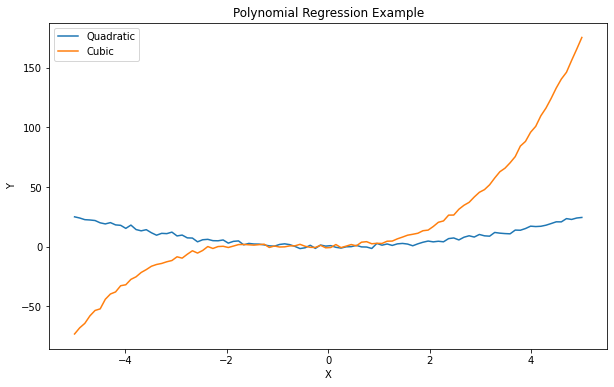

In [ ]:
x = np.linspace(-5, 5, 100)
y = x**2  + np.random.normal(0, 1, 100)
y_cubic = x**3 + 2*x**2 + np.random.normal(0, 1, 100)


# Plotting the data
plt.plot(x, y, label='Quadratic')
plt.plot(x, y_cubic, label='Cubic')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Example')

In [ ]:
#Line is not a good fit and so we are going for polynomials
# We will create a line as well as a polynomial for comparison

#numpy.polyfit
# numpy.linespace -> create space and plot values -> Space creation using args
# numpy.poly1d -> To create the polynomial equation

In [ ]:
def create_polynomial_plot(feature,label):
  #convert to 1d
  x_coordinates=feature
  y_coordinates=np.squeeze(label)

  linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
  quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
  cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))


  values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates,color='blue')
  plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
  plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
  plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')

  plt.xlabel("%s from data" %(feature.name))
  plt.ylabel("Points")

  plt.rcParams["figure.figsize"]=(12,6)

  plt.legend()
  plt.title("Linear vs Quadratic")

  plt.show()





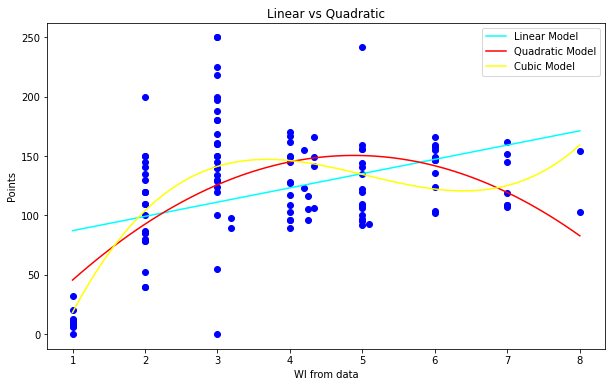

In [ ]:
create_polynomial_plot(X_train_clean.WI,y_train)

In [ ]:
########
#1 Create a set of polynomial features

#2 Apply a linear regression
########

In [ ]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures()

In [ ]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)


LinearRegression()

In [ ]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",metrics.r2_score(y_test,predictions))

In [ ]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

In [ ]:
#Degree 1 --> RMSE - 47.4 R2 - 0.23
#Degree 2 --> RMSE - 39.8 R2 - 0.45
#Degree 3 --> RMSE - 297 R2 - -29

In [ ]:
#You can also use below function for polynomial regression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# pp=Pipeline([
#     ('poly',PolynomialFeatures(degree=2)),
#     ('model',LinearRegression())
# ])

# pp.fit(X_train_clean,y_train)
# y_pred=pp.predict(test)

### **Think about it - II**

Are there any limitations or assumptions associated with using polynomial regression? Can you think of any scenarios where polynomial regression might not be the most appropriate model to use? What alternatives might be considered in those cases?

## **Try it out - I**

* Try different polynomial degrees: We have used a second-degree polynomial to fit the data. You can try using higher or lower degrees to see how it affects the model's performance.

* Try different regression models: We have used linear regression to fit the polynomial features. You can try using other regression models like ridge regression, Lasso regression, or ElasticNet regression and compare their performance.

* Feature selection: Instead of using all the features, try selecting the top K features based on their correlation with the target variable and see how the model performs.

* Data scaling: Try scaling the features using standardization or normalization and see if it improves the model's performance.

* Visualize the results: Plot the predicted values against the actual values and see how well the model fits the data. You can also plot the polynomial curve and see how it varies with the target variable.





## **Conclusion**

In conclusion, the objective of this project was to predict the points scored by a sports team in the NBA using polynomial regression. We utilized the NBA dataset which included various relevant variables such as the team, number of points scored, and various practices like weightlifting, yoga, and running sessions.

To arrive at the final solution, we first performed data preprocessing techniques such as imputation to handle missing values in the dataset. Then we explored the relationships between the variables in the dataset using univariate and bivariate analysis.

We then used polynomial regression to build a model that could predict the points scored by the team. Finally, we evaluated the performance of the model using metrics such as mean absolute error and R-squared.

The outcome of this project highlights the importance of data analysis and modeling in understanding the relationships between variables and making accurate predictions. The polynomial regression model built in this project can serve as a valuable tool for stakeholders who are interested in understanding the points scored by a sports team in the NBA.

Next:

Piecewise Regression is a method in which the independent variable is divided into intervals and each interval is modeled using a different linear function. This approach is useful when the data shows different linear trends in different parts of the data.

Spline Regression, also known as spline interpolation, involves creating a continuous function from several polynomial regression functions. It is a useful tool for modeling data that exhibit non-linear relationships.

The project will provide a comprehensive explanation of the mathematical concepts behind Piecewise and Spline Regression and will cover the implementation of these models using Python.

## **Polynomial Regression in Real Life**

Polynomial regression is used in various real-life applications, here are a few examples:

* Stock Market Analysis: The stock market is also a classic example of where polynomial regression is used. The prices of stocks often exhibit non-linear trends, with prices fluctuating over time. A polynomial regression model can be used to identify these trends and make predictions about future stock prices.

* Climate Change Studies: In climate change studies, polynomial regression is used to model the relationship between various environmental factors, such as temperature and precipitation, and their impact on ecosystems. The relationships between these factors can be complex, and polynomial regression is often used to help model and understand these relationships.

* Predicting housing prices: A polynomial regression model can be used to predict housing prices based on various factors such as location, square footage, and number of rooms. The model can capture non-linear relationships between these factors and the housing price.

## **Interview Questions**

* What are some common imputation techniques used to handle missing data in a dataset?

* Can you explain the concept of Analysis of Variance (ANOVA) and how is it used in regression analysis?

* What is Chatterjee Correlation and how is it different from Pearson Correlation?

* What is Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), and how do they help in model selection?

* Can you explain the concept of maximum likelihood estimation in regression analysis?

* What is linear regression, and what are the assumptions made in linear regression?

* Can you explain the difference between simple linear regression and multiple linear regression?

* What is polynomial regression and what are the use cases for polynomial regression?

* How does one decide the optimal degree of polynomial regression for a given dataset?

* Can you explain the process of creating a polynomial regression model from scratch in Python?
